# Autour du paradoxe de Simpson

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
donnees = pd.read_csv('Subject6_smoking.csv')
donnees

Smoker Status   Age
0       Yes  Alive  21.0
1       Yes  Alive  19.3
2        No   Dead  57.5
3        No  Alive  47.1
4       Yes  Alive  81.4
5        No  Alive  36.8
6        No  Alive  23.8
7       Yes   Dead  57.5
8       Yes  Alive  24.8
9       Yes  Alive  49.5
10      Yes  Alive  30.0
11       No   Dead  66.0
12      Yes  Alive  49.2
13       No  Alive  58.4
14       No   Dead  60.6
15       No  Alive  25.1
16       No  Alive  43.5
17       No  Alive  27.1
18       No  Alive  58.3
19      Yes  Alive  65.7
20       No   Dead  73.2
21      Yes  Alive  38.3
22       No  Alive  33.4
23      Yes   Dead  62.3
24       No  Alive  18.0
25       No  Alive  56.2
26      Yes  Alive  59.2
27       No  Alive  25.8
28       No   Dead  36.9
29       No  Alive  20.2
...     ...    ...   ...
1284    Yes   Dead  36.0
1285    Yes  Alive  48.3
1286     No  Alive  63.1
1287     No  Alive  60.8
1288    Yes   Dead  39.3
1289     No  Alive  36.7
1290     No  Alive  63.8
1291     No   Dead  71.3
1292     No  Alive  57.7
1293     No  Alive  63.2
1294     No  Alive  46.6
1295    Yes   Dead  82.4
1296    Yes  Alive  38.3
1297    Yes  Alive  32.7
1298     No  Alive  39.7
1299    Yes   Dead  60.0
1300     No   Dead  71.0
1301     No  Alive  20.5
1302     No  Alive  44.4
1303    Yes  Alive  31.2
1304    Yes  Alive  47.8
1305    Yes  Alive  60.9
1306     No   Dead  61.4
1307    Yes  Alive  43.0
1308     No  Alive  42.1
1309    Yes  Alive  35.9
1310     No  Alive  22.3
1311    Yes   Dead  62.1
1312     No   Dead  88.6
1313     No  Alive  39.1

[1314 rows x 3 columns]

In [15]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 3 columns):
Smoker    1314 non-null object
Status    1314 non-null object
Age       1314 non-null float64
dtypes: float64(1), object(2)
memory usage: 30.9+ KB


Pour faire un peu de statistiques sur ces données, on peut représenter `Yes` par `1` et `No`par `0`, et `Alive`par `1`et `Dead` par `0`. On va en fait procéder autrement mais c'était ma première approche naïve, je laisse donc mon code initial ainsi que les résultats obtenus. Au lieu d'utiliser la methode `apply` j'aurais également pu utiliser la méthode `replace`.

``` 
def convert(x):
    if (x=='Yes') | (x=="Alive"):
        return 1
    elif (x=='No') | (x=='Dead'):
        return 0

donnees['Smoker'] = donnees['Smoker'].apply(convert)
donnees['Status'] = donnees['Status'].apply(convert)
donnees[['Smoker','Status']].sum()
```

Parmi les 1314 femmes sondées, il y a donc 582 fumeuses, et 945 des femmes (fumeuses et non fumeuses) sont encore vivantes 20 ans après.

Ré-obtenons ces informations à l'aide des méthodes de regroupement.

In [39]:
donnees['Smoker'].value_counts()

No     732
Yes    582
Name: Smoker, dtype: int64

In [40]:
donnees['Status'].value_counts()

Alive    945
Dead     369
Name: Status, dtype: int64

Maintenant regardons les infos jointes, pour essayer de comprendre les dépendances. Pour ça, on pourrait écrire 
```
donnees[['Smoker,'Status']].value_counts()
```
pour avoir le tableau souhaité, mais ce notebook jupyter utilise une version non à jour de panda où on ne peut pas utiliser `value_counts` sur un `dataframe`, donc on ruse.

In [41]:
tableau = donnees.groupby(['Smoker','Status']).count()
tableau = tableau.rename(columns={'Age':'Total'})
tableau

Total
Smoker Status       
No     Alive     502
       Dead      230
Yes    Alive     443
       Dead      139

In [35]:
tableau.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4 entries, (No, Alive) to (Yes, Dead)
Data columns (total 1 columns):
Total    4 non-null int64
dtypes: int64(1)
memory usage: 238.0+ bytes


Un autre moyen d'obtenir le même tableau (toujours avec le même souci de nom).

In [55]:
donnees.pivot_table(index = ['Smoker','Status'], aggfunc='count', margins=True)

Age
Smoker Status      
No     Alive    502
       Dead     230
Yes    Alive    443
       Dead     139
All            1314

Une manière plus agréable visuellement d'avoir les mêmes données, et en supprimpant le problème de nom :

In [70]:
table2 = donnees.pivot_table(index = 'Smoker',values='Age', columns='Status', aggfunc='count', margins=True) 
table2

Status  Alive  Dead   All
Smoker                   
No        502   230   732
Yes       443   139   582
All       945   369  1314

In [71]:
table2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, No to All
Data columns (total 3 columns):
Alive    3 non-null int64
Dead     3 non-null int64
All      3 non-null int64
dtypes: int64(3)
memory usage: 96.0+ bytes


Remarquons que si on ne précise pas `values='Age'`, on obtient quelque chose de proche mais avec un souci de nom à nouveau.

In [68]:
table3 = donnees.pivot_table(index = 'Smoker', columns='Status', aggfunc='count', margins=True) 
table3

Age           
Status Alive Dead   All
Smoker                 
No       502  230   732
Yes      443  139   582
All      945  369  1314

In [69]:
table3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, No to All
Data columns (total 3 columns):
(Age, Alive)    3 non-null int64
(Age, Dead)     3 non-null int64
(Age, All)      3 non-null int64
dtypes: int64(3)
memory usage: 96.0+ bytes


Evaluons maintenant le taux de mortalité selon si on fume ou non.

In [73]:
table2['ratio_deces'] = table2['Dead']/table2['All']
table2

Status  Alive  Dead   All  ratio_deces
Smoker                                
No        502   230   732     0.314208
Yes       443   139   582     0.238832
All       945   369  1314     0.280822

On observe donc que les fumeuses ont eu un taux de décès plus faible !

Le problème avec notre étude, c'est que l'âge (qui est clairement un facteur dans la mort des individus) des participants n'a pas été pris en compte, or le fait de fumer (ou non) pour une femme dans les années 70 est corrélé avec l'âge et nos groupes de sont pas équivalent du point de vue de l'âge. On peut facilement le vérifier ici :

In [72]:
donnees.pivot_table(index = 'Smoker',values='Age', columns='Status', aggfunc='mean', margins=True)

Status      Alive       Dead        All
Smoker                                 
No      40.347410  70.481739  49.815847
Yes     39.648984  58.996403  44.269759
All     40.020000  66.155285  47.359361

Ajoutons des tranches d'ages pour prendre en compte cette composante.

In [74]:
def classifie(x):
    if x <= 34:
        return '18-34 ans'
    elif x <= 54:
        return '35-54 ans'
    elif x <= 65:
        return '55-65 ans'
    else:
        return '>65 ans'
    
donnees['tranche']=donnees['Age'].apply(classifie)

In [75]:
donnees

Smoker Status   Age    tranche
0       Yes  Alive  21.0  18-34 ans
1       Yes  Alive  19.3  18-34 ans
2        No   Dead  57.5  55-65 ans
3        No  Alive  47.1  35-54 ans
4       Yes  Alive  81.4    >65 ans
5        No  Alive  36.8  35-54 ans
6        No  Alive  23.8  18-34 ans
7       Yes   Dead  57.5  55-65 ans
8       Yes  Alive  24.8  18-34 ans
9       Yes  Alive  49.5  35-54 ans
10      Yes  Alive  30.0  18-34 ans
11       No   Dead  66.0    >65 ans
12      Yes  Alive  49.2  35-54 ans
13       No  Alive  58.4  55-65 ans
14       No   Dead  60.6  55-65 ans
15       No  Alive  25.1  18-34 ans
16       No  Alive  43.5  35-54 ans
17       No  Alive  27.1  18-34 ans
18       No  Alive  58.3  55-65 ans
19      Yes  Alive  65.7    >65 ans
20       No   Dead  73.2    >65 ans
21      Yes  Alive  38.3  35-54 ans
22       No  Alive  33.4  18-34 ans
23      Yes   Dead  62.3  55-65 ans
24       No  Alive  18.0  18-34 ans
25       No  Alive  56.2  55-65 ans
26      Yes  Alive  59.2  55-65 ans
27       No  Alive  25.8  18-34 ans
28       No   Dead  36.9  35-54 ans
29       No  Alive  20.2  18-34 ans
...     ...    ...   ...        ...
1284    Yes   Dead  36.0  35-54 ans
1285    Yes  Alive  48.3  35-54 ans
1286     No  Alive  63.1  55-65 ans
1287     No  Alive  60.8  55-65 ans
1288    Yes   Dead  39.3  35-54 ans
1289     No  Alive  36.7  35-54 ans
1290     No  Alive  63.8  55-65 ans
1291     No   Dead  71.3    >65 ans
1292     No  Alive  57.7  55-65 ans
1293     No  Alive  63.2  55-65 ans
1294     No  Alive  46.6  35-54 ans
1295    Yes   Dead  82.4    >65 ans
1296    Yes  Alive  38.3  35-54 ans
1297    Yes  Alive  32.7  18-34 ans
1298     No  Alive  39.7  35-54 ans
1299    Yes   Dead  60.0  55-65 ans
1300     No   Dead  71.0    >65 ans
1301     No  Alive  20.5  18-34 ans
1302     No  Alive  44.4  35-54 ans
1303    Yes  Alive  31.2  18-34 ans
1304    Yes  Alive  47.8  35-54 ans
1305    Yes  Alive  60.9  55-65 ans
1306     No   Dead  61.4  55-65 ans
1307    Yes  Alive  43.0  35-54 ans
1308     No  Alive  42.1  35-54 ans
1309    Yes  Alive  35.9  35-54 ans
1310     No  Alive  22.3  18-34 ans
1311    Yes   Dead  62.1  55-65 ans
1312     No   Dead  88.6    >65 ans
1313     No  Alive  39.1  35-54 ans

[1314 rows x 4 columns]

In [84]:
table18_34 = pd.pivot_table(donnees[donnees['Age']<35],index = 'Smoker',values='Age', columns='Status', aggfunc='count', margins=True)
table18_34['ratio_deces'] = table18_34['Dead']/table18_34['All']
table18_34

Status  Alive  Dead  All  ratio_deces
Smoker                               
No        221     6  227     0.026432
Yes       182     7  189     0.037037
All       403    13  416     0.031250

In [86]:
table35_54 = pd.pivot_table(donnees[(donnees['Age']>=35) & (donnees['Age']<55)],index = 'Smoker',values='Age', columns='Status', aggfunc='count', margins=True)
table35_54['ratio_deces'] = table35_54['Dead']/table35_54['All']
table35_54

Status  Alive  Dead  All  ratio_deces
Smoker                               
No        172    19  191     0.099476
Yes       190    39  229     0.170306
All       362    58  420     0.138095

In [87]:
table55_65 = pd.pivot_table(donnees[(donnees['Age']>=55) & (donnees['Age']<66)],index = 'Smoker',values='Age', columns='Status', aggfunc='count', margins=True)
table55_65['ratio_deces'] = table55_65['Dead']/table55_65['All']
table55_65

Status  Alive  Dead  All  ratio_deces
Smoker                               
No         82    49  131     0.374046
Yes        65    53  118     0.449153
All       147   102  249     0.409639

In [88]:
table65plus = pd.pivot_table(donnees[(donnees['Age']>65)],index = 'Smoker',values='Age', columns='Status', aggfunc='count', margins=True)
table65plus['ratio_deces'] = table65plus['Dead']/table65plus['All']
table65plus

Status  Alive  Dead  All  ratio_deces
Smoker                               
No         27   165  192     0.859375
Yes         7    42   49     0.857143
All        34   207  241     0.858921

On remarque que dans chaque tranche d'age, les fumeuses ont un taux de décès plus fort. La tendance s'inverse quand on ne regarde plus l'âge car dans nos données les fumeuses sont plutôt plus jeunes que les non fumeuses.

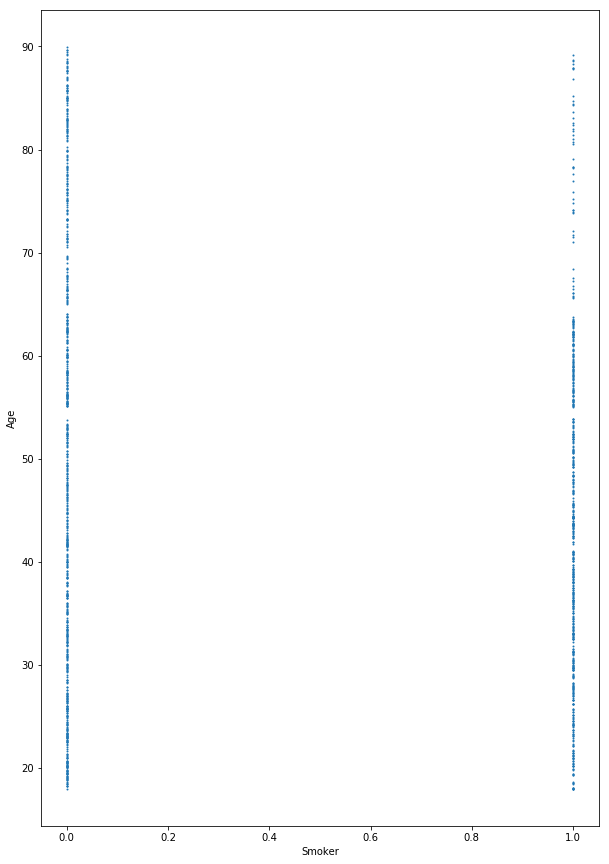

In [98]:
copy = donnees.copy()
copy['Smoker']=donnees['Smoker'].replace({'Yes':1, 'No':0})
copy.plot.scatter(x='Smoker', y='Age', figsize=(10,15),s=1)

Le graphe si dessus n'est pas si parlant, on peut sinon simplement calculer la proportion de fumeuses par tranche d'age et voir que cette proportion s'effondre pour les personnes de plus de 65 ans.

In [99]:
copy.groupby('tranche')['Smoker'].mean()

tranche
18-34 ans    0.452500
35-54 ans    0.543578
55-65 ans    0.485232
>65 ans      0.203320
Name: Smoker, dtype: float64